<a href="https://colab.research.google.com/github/RhysWangJunfei/deep_learning/blob/master/infogan_mnist_keras_tpu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

import os
import tensorflow_datasets as tfds

In [2]:
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_cluster(resolver)
# This is the TPU initialization code that has to be at the beginning.
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

INFO:tensorflow:Initializing the TPU system: grpc://10.18.221.234:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.18.221.234:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU')]


In [3]:
a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
with tf.device('/TPU:0'):
  c = tf.matmul(a, b)
print("c device: ", c.device)
print(c)

c device:  /job:worker/replica:0/task:0/device:TPU:0
tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [4]:
strategy = tf.distribute.TPUStrategy(resolver)

INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [5]:
@tf.function
def matmul_fn(x, y):
  z = tf.matmul(x, y)
  return z

z = strategy.run(matmul_fn, args=(a, b))
print(z)

PerReplica:{
  0: tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32),
  1: tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32),
  2: tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32),
  3: tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32),
  4: tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32),
  5: tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32),
  6: tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32),
  7: tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)
}


In [ ]:
'''Trains infoGAN on MNIST using Keras
This version of infoGAN is similar to DCGAN. The difference mainly
is that the z-vector of geneerator is conditioned by a one-hot label
to produce specific fake images. The discriminator is trained to
discriminate real from fake images and predict the corresponding
one-hot labels.
[1] Radford, Alec, Luke Metz, and Soumith Chintala.
"Unsupervised representation learning with deep convolutional
generative adversarial networks." arXiv preprint arXiv:1511.06434 (2015).
[2] Chen, Xi, et al. "Infogan: Interpretable representation learning by
information maximizing generative adversarial nets." 
Advances in Neural Information Processing Systems. 2016.
'''

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from tensorflow.keras.layers import Input
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras import backend as K

import numpy as np
import argparse

import sys
sys.path.append("..")
'''GAN model builder and util functions
[1] Radford, Alec, Luke Metz, and Soumith Chintala.
"Unsupervised representation learning with deep convolutional
generative adversarial networks." arXiv preprint arXiv:1511.06434 (2015).
'''


from tensorflow.keras.layers import Activation, Dense, Input
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.layers import Reshape, Conv2DTranspose
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import concatenate
from tensorflow.keras.models import Model

import numpy as np
import math
import matplotlib.pyplot as plt
import os

def def_generator(inputs,
              image_size,
              activation='sigmoid',
              labels=None,
              codes=None):
    """Build a Generator Model
    Stack of BN-ReLU-Conv2DTranpose to generate fake images.
    Output activation is sigmoid instead of tanh in [1].
    Sigmoid converges easily.
    Arguments:
        inputs (Layer): Input layer of the generator (the z-vector)
        image_size (int): Target size of one side 
            (assuming square image)
        activation (string): Name of output activation layer
        labels (tensor): Input labels
        codes (list): 2-dim disentangled codes for InfoGAN
    Returns:
        Model: Generator Model
    """
    image_resize = image_size // 4
    # network parameters
    kernel_size = 5
    layer_filters = [128, 64, 32, 1]

    if labels is not None:
        if codes is None:
            # ACGAN labels
            # concatenate z noise vector and one-hot labels
            inputs = [inputs, labels]
        else:
            # infoGAN codes
            # concatenate z noise vector, 
            # one-hot labels and codes 1 & 2
            inputs = [inputs, labels] + codes
        x = concatenate(inputs, axis=1)
    elif codes is not None:
        # generator 0 of StackedGAN
        inputs = [inputs, codes]
        x = concatenate(inputs, axis=1)
    else:
        # default input is just 100-dim noise (z-code)
        x = inputs

    x = Dense(image_resize * image_resize * layer_filters[0])(x)
    x = Reshape((image_resize, image_resize, layer_filters[0]))(x)

    for filters in layer_filters:
        # first two convolution layers use strides = 2
        # the last two use strides = 1
        if filters > layer_filters[-2]:
            strides = 2
        else:
            strides = 1
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = Conv2DTranspose(filters=filters,
                            kernel_size=kernel_size,
                            strides=strides,
                            padding='same')(x)

    if activation is not None:
        x = Activation(activation)(x)

    # generator output is the synthesized image x
    return Model(inputs, x, name='generator')


def def_discriminator(inputs,
                  activation='sigmoid',
                  num_labels=None,
                  num_codes=None):
    """Build a Discriminator Model
    Stack of LeakyReLU-Conv2D to discriminate real from fake
    The network does not converge with BN so it is not used here
    unlike in [1]
    Arguments:
        inputs (Layer): Input layer of the discriminator (the image)
        activation (string): Name of output activation layer
        num_labels (int): Dimension of one-hot labels for ACGAN & InfoGAN
        num_codes (int): num_codes-dim Q network as output 
                    if StackedGAN or 2 Q networks if InfoGAN
                    
    Returns:
        Model: Discriminator Model
    """
    kernel_size = 5
    layer_filters = [32, 64, 128, 256]

    x = inputs
    for filters in layer_filters:
        # first 3 convolution layers use strides = 2
        # last one uses strides = 1
        if filters == layer_filters[-1]:
            strides = 1
        else:
            strides = 2
        x = LeakyReLU(alpha=0.2)(x)
        x = Conv2D(filters=filters,
                   kernel_size=kernel_size,
                   strides=strides,
                   padding='same')(x)

    x = Flatten()(x)
    # default output is probability that the image is real
    outputs = Dense(1)(x)
    if activation is not None:
        print(activation)
        outputs = Activation(activation)(outputs)

    if num_labels:
        # ACGAN and InfoGAN have 2nd output
        # 2nd output is 10-dim one-hot vector of label
        layer = Dense(layer_filters[-2])(x)
        labels = Dense(num_labels)(layer)
        labels = Activation('softmax', name='label')(labels)
        if num_codes is None:
            outputs = [outputs, labels]
        else:
            # InfoGAN have 3rd and 4th outputs
            # 3rd output is 1-dim continous Q of 1st c given x
            code1 = Dense(1)(layer)
            code1 = Activation('sigmoid', name='code1')(code1)

            # 4th output is 1-dim continuous Q of 2nd c given x
            code2 = Dense(1)(layer)
            code2 = Activation('sigmoid', name='code2')(code2)

            outputs = [outputs, labels, code1, code2]
    elif num_codes is not None:
        # StackedGAN Q0 output
        # z0_recon is reconstruction of z0 normal distribution
        z0_recon =  Dense(num_codes)(x)
        z0_recon = Activation('tanh', name='z0')(z0_recon)
        outputs = [outputs, z0_recon]

    return Model(inputs, outputs, name='discriminator')


def plot_images(generator,
                noise_input,
                noise_label=None,
                noise_codes=None,
                show=False,
                step=0,
                model_name="gan"):
    """Generate fake images and plot them
    For visualization purposes, generate fake images
    then plot them in a square grid
    # Arguments
        generator (Model): The Generator Model for 
            fake images generation
        noise_input (ndarray): Array of z-vectors
        show (bool): Whether to show plot or not
        step (int): Appended to filename of the save images
        model_name (string): Model name
    """
    os.makedirs(model_name, exist_ok=True)
    filename = os.path.join(model_name, "%05d.png" % step)
    rows = int(math.sqrt(noise_input.shape[0]))
    if noise_label is not None:
        noise_input = [noise_input, noise_label]
        if noise_codes is not None:
            noise_input += noise_codes

    images = generator.predict(noise_input)
    plt.figure(figsize=(2.2, 2.2))
    num_images = images.shape[0]
    image_size = images.shape[1]
    for i in range(num_images):
        plt.subplot(rows, rows, i + 1)
        image = np.reshape(images[i], [image_size, image_size])
        plt.imshow(image, cmap='gray')
        plt.axis('off')
    plt.savefig(filename)
    if show:
        plt.show()
    else:
        plt.close('all')


def test_generator(generator):
    noise_input = np.random.uniform(-1.0, 1.0, size=[16, 100])
    plot_images(generator,
                noise_input=noise_input,
                show=True,
                model_name="test_outputs")

# from ..lib import gan

def train(models, data, params):
    """Train the Discriminator and Adversarial networks
    Alternately train discriminator and adversarial networks by batch.
    Discriminator is trained first with real and fake images,
    corresponding one-hot labels and continuous codes.
    Adversarial is trained next with fake images pretending 
    to be real, corresponding one-hot labels and continous codes.
    Generate sample images per save_interval.
    # Arguments
        models (Models): Generator, Discriminator, Adversarial models
        data (tuple): x_train, y_train data
        params (tuple): Network parameters
    """
    # the GAN models
    generator, discriminator, adversarial = models
    # images and their one-hot labels
    x_train, y_train = data
    # network parameters
    batch_size, latent_size, train_steps, num_labels, model_name = \
            params
    # the generator image is saved every 500 steps
    save_interval = 2000
    # code standard deviation
    code_std = 0.5
    # noise vector to see how the generator output 
    # evolves during training
    noise_input = np.random.uniform(-1.0,
                                    1.0,
                                    size=[16, latent_size])
    # random class labels and codes
    noise_label = np.eye(num_labels)[np.arange(0, 16) % num_labels]
    noise_code1 = np.random.normal(scale=code_std, size=[16, 1])
    noise_code2 = np.random.normal(scale=code_std, size=[16, 1])
    # number of elements in train dataset
    train_size = x_train.shape[0]
    print(model_name,
          "Labels for generated images: ",
          np.argmax(noise_label, axis=1))
    for i in range(train_steps):
        # train the discriminator for 1 batch
        # 1 batch of real (label=1.0) and fake images (label=0.0)
        # randomly pick real images and 
        # corresponding labels from dataset 
        rand_indexes = np.random.randint(0,
                                         train_size,
                                         size=batch_size)
        real_images = x_train[rand_indexes]
        real_labels = y_train[rand_indexes]
        # random codes for real images
        real_code1 = np.random.normal(scale=code_std,
                                      size=[batch_size, 1])
        real_code2 = np.random.normal(scale=code_std, 
                                      size=[batch_size, 1])
        # generate fake images, labels and codes
        noise = np.random.uniform(-1.0,
                                  1.0, 
                                  size=[batch_size, latent_size])
        fake_labels = np.eye(num_labels)[np.random.choice(num_labels,
                                                          batch_size)]
        fake_code1 = np.random.normal(scale=code_std,
                                      size=[batch_size, 1])
        fake_code2 = np.random.normal(scale=code_std, 
                                      size=[batch_size, 1])
        inputs = [noise, fake_labels, fake_code1, fake_code2]
        fake_images = generator.predict(inputs)

        # real + fake images = 1 batch of train data
        x = np.concatenate((real_images, fake_images))
        labels = np.concatenate((real_labels, fake_labels))
        codes1 = np.concatenate((real_code1, fake_code1))
        codes2 = np.concatenate((real_code2, fake_code2))

        # label real and fake images
        # real images label is 1.0
        y = np.ones([2 * batch_size, 1])
        # fake images label is 0.0
        y[batch_size:, :] = 0

        # train discriminator network, 
        # log the loss and label accuracy
        outputs = [y, labels, codes1, codes2]
        # metrics = ['loss', 'activation_1_loss', 'label_loss',
        # 'code1_loss', 'code2_loss', 'activation_1_acc',
        # 'label_acc', 'code1_acc', 'code2_acc']
        # from discriminator.metrics_names
        metrics = discriminator.train_on_batch(x, outputs)
        fmt = "%d: [dis: %f, bce: %f, ce: %f, mi: %f, mi:%f, acc: %f]"
        log = fmt % (i, metrics[0], metrics[1], metrics[2], metrics[3], metrics[4], metrics[6])

        # train the adversarial network for 1 batch
        # 1 batch of fake images with label=1.0 and
        # corresponding one-hot label or class + random codes
        # since the discriminator weights are frozen 
        # in adversarial network only the generator is trained
        # generate fake images, labels and codes
        noise = np.random.uniform(-1.0,
                                  1.0,
                                  size=[batch_size, latent_size])
        fake_labels = np.eye(num_labels)[np.random.choice(num_labels,
                                                          batch_size)]
        fake_code1 = np.random.normal(scale=code_std,
                                      size=[batch_size, 1])
        fake_code2 = np.random.normal(scale=code_std, 
                                      size=[batch_size, 1])
        # label fake images as real
        y = np.ones([batch_size, 1])

        # train the adversarial network 
        # note that unlike in discriminator training, 
        # we do not save the fake images in a variable
        # the fake images go to the discriminator 
        # input of the adversarial for classification
        # log the loss and label accuracy
        inputs = [noise, fake_labels, fake_code1, fake_code2]
        outputs = [y, fake_labels, fake_code1, fake_code2]
        metrics  = adversarial.train_on_batch(inputs, outputs)
        fmt = "%s [adv: %f, bce: %f, ce: %f, mi: %f, mi:%f, acc: %f]"
        log = fmt % (log, metrics[0], metrics[1], metrics[2], metrics[3], metrics[4], metrics[6])

        print(log)
        if (i + 1) % save_interval == 0:
            # plot generator images on a periodic basis
            plot_images(generator,
                            noise_input=noise_input,
                            noise_label=noise_label,
                            noise_codes=[noise_code1, noise_code2],
                            show=False,
                            step=(i + 1),
                            model_name=model_name)
   
        # save the model after training the generator
        # the trained generator can be reloaded for
        # future MNIST digit generation
        if (i + 1) % (5) == 0:
            generator.save(model_name + ".h5")
            discriminator.save("d.h5")
            adversarial.save("a.h5")


def mi_loss(c, q_of_c_given_x):
    """ Mutual information, Equation 5 in [2],
        assuming H(c) is constant
    """
    # mi_loss = -c * log(Q(c|x))
    return -K.mean(K.sum(c * K.log(q_of_c_given_x + K.epsilon()), 
                                   axis=1))


def build_and_train_models(latent_size=100):
    """Load the dataset, build InfoGAN discriminator,
    generator, and adversarial models.
    Call the InfoGAN train routine.
    """
    # load MNIST dataset
    (x_train, y_train), (_, _) = mnist.load_data()

    # reshape data for CNN as (28, 28, 1) and normalize
    image_size = x_train.shape[1]
    x_train = np.reshape(x_train, [-1, image_size, image_size, 1])
    x_train = x_train.astype('float32') / 255

    # train labels
    num_labels = len(np.unique(y_train))
    y_train = to_categorical(y_train)

    model_name = "infogan_mnist"
    # network parameters
    batch_size = 64
    train_steps = 40000
    lr = 2e-4
    decay = 6e-8
    input_shape = (image_size, image_size, 1)
    label_shape = (num_labels, )
    code_shape = (1, )

    # build discriminator model
    inputs = Input(shape=input_shape, name='discriminator_input')
    # call discriminator builder with 4 outputs: 
    # source, label, and 2 codes
    discriminator = def_discriminator(inputs,
                                      num_labels=num_labels,
                                      num_codes=2)
    # [1] uses Adam, but discriminator converges easily with RMSprop
    optimizer = RMSprop(lr=lr, decay=decay)
    # loss functions: 1) probability image is real 
    # (binary crossentropy)
    # 2) categorical cross entropy image label,
    # 3) and 4) mutual information loss
    loss = ['binary_crossentropy', 
            'categorical_crossentropy', 
            mi_loss, 
            mi_loss]
    # lamda or mi_loss weight is 0.5
    loss_weights = [1.0, 1.0, 0.5, 0.5]
    discriminator.compile(loss=loss,
                          loss_weights=loss_weights,
                          optimizer=optimizer,
                          metrics=['accuracy'])
    discriminator.summary()

    # build generator model
    input_shape = (latent_size, )
    inputs = Input(shape=input_shape, name='z_input')
    labels = Input(shape=label_shape, name='labels')
    code1 = Input(shape=code_shape, name="code1")
    code2 = Input(shape=code_shape, name="code2")
    # call generator with inputs, 
    # labels and codes as total inputs to generator
    generator = def_generator(inputs,
                              image_size,
                              labels=labels,
                              codes=[code1, code2])
    generator.summary()

    # build adversarial model = generator + discriminator
    optimizer = RMSprop(lr=lr*0.5, decay=decay*0.5)
    discriminator.trainable = False
    # total inputs = noise code, labels, and codes
    inputs = [inputs, labels, code1, code2]
    adversarial = Model(inputs,
                        discriminator(generator(inputs)),
                        name=model_name)
    # same loss as discriminator
    adversarial.compile(loss=loss,
                        loss_weights=loss_weights,
                        optimizer=optimizer,
                        metrics=['accuracy'])
    adversarial.summary()

    # train discriminator and adversarial networks
    models = (generator, discriminator, adversarial)
    data = (x_train, y_train)
    params = (batch_size, 
              latent_size, 
              train_steps, 
              num_labels, 
              model_name)
    train(models, data, params)


def test_generator(generator, params, latent_size=100):
    label, code1, code2, p1, p2 = params
    noise_input = np.random.uniform(-1.0, 1.0, size=[16, latent_size])
    step = 0
    if label is None:
        num_labels = 10
        noise_label = np.eye(num_labels)[np.random.choice(num_labels, 16)]
    else:
        noise_label = np.zeros((16, 10))
        noise_label[:,label] = 1
        step = label

    code_std = 2
    if code1 is None:
        noise_code1 = np.random.normal(scale=0.5, size=[16, 1])
    else:
        if p1:
            a = np.linspace(-code_std, code_std, 16)
            a = np.reshape(a, [16, 1])
            noise_code1 = np.ones((16, 1)) * a
        else:
            noise_code1 = np.ones((16, 1)) * code1
        print(noise_code1)

    if code2 is None:
        noise_code2 = np.random.normal(scale=0.5, size=[16, 1])
    else:
        if p2:
            a = np.linspace(-code_std, code_std, 16)
            a = np.reshape(a, [16, 1])
            noise_code2 = np.ones((16, 1)) * a
        else:
            noise_code2 = np.ones((16, 1)) * code2
        print(noise_code2)

    plot_images(generator,
                    noise_input=noise_input,
                    noise_label=noise_label,
                    noise_codes=[noise_code1, noise_code2],
                    show=True,
                    step=step,
                    model_name="test_outputs")



        

In [ ]:
build_and_train_models(latent_size=62)

Streaming output truncated to the last 5000 lines.
35000: [dis: -0.317430, bce: 0.647396, ce: 0.000533, mi: -0.747109, mi:-1.183608, acc: 1.000000] [adv: -1.679979, bce: 0.811185, ce: 0.000105, mi: -2.308044, mi:-2.674493, acc: 1.000000]
35001: [dis: -0.675404, bce: 0.619442, ce: 0.002258, mi: -1.345068, mi:-1.249140, acc: 1.000000] [adv: -1.858483, bce: 0.775342, ce: 0.000068, mi: -2.764560, mi:-2.503228, acc: 1.000000]
35002: [dis: -0.876648, bce: 0.650573, ce: 0.016753, mi: -1.357118, mi:-1.730829, acc: 0.992188] [adv: -2.834088, bce: 0.979045, ce: 0.004348, mi: -3.592019, mi:-4.042941, acc: 1.000000]
35003: [dis: -0.507965, bce: 0.646330, ce: 0.055512, mi: -1.595235, mi:-0.824378, acc: 0.984375] [adv: -2.323324, bce: 0.697656, ce: 0.000003, mi: -2.791224, mi:-3.250743, acc: 1.000000]
35004: [dis: -1.013983, bce: 0.629148, ce: 0.026372, mi: -1.848958, mi:-1.490048, acc: 0.984375] [adv: -2.330312, bce: 1.205802, ce: 0.000537, mi: -4.181808, mi:-2.891494, acc: 1.000000]
35005: [dis: -

[[-2.        ]
 [-1.73333333]
 [-1.46666667]
 [-1.2       ]
 [-0.93333333]
 [-0.66666667]
 [-0.4       ]
 [-0.13333333]
 [ 0.13333333]
 [ 0.4       ]
 [ 0.66666667]
 [ 0.93333333]
 [ 1.2       ]
 [ 1.46666667]
 [ 1.73333333]
 [ 2.        ]]
[[-2.        ]
 [-1.73333333]
 [-1.46666667]
 [-1.2       ]
 [-0.93333333]
 [-0.66666667]
 [-0.4       ]
 [-0.13333333]
 [ 0.13333333]
 [ 0.4       ]
 [ 0.66666667]
 [ 0.93333333]
 [ 1.2       ]
 [ 1.46666667]
 [ 1.73333333]
 [ 2.        ]]


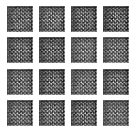

In [ ]:
generator = load_model('infogan_mnist.h5')
label = 1
code1 = 1
code2 = 1
p1 = 1
p2 = 1
params = (label, code1, code2, p1, p2)
test_generator(generator, params, latent_size=62)

In [ ]:
# train labels
num_labels = 10

model_name = "infogan_mnist"
# network parameters
batch_size = 64
train_steps = 40000
lr = 2e-4
decay = 6e-8
input_shape = (28, 28, 1)
label_shape = (num_labels, )
code_shape = (1, )

# build discriminator model
inputs = Input(shape=input_shape, name='discriminator_input')
# call discriminator builder with 4 outputs: 
# source, label, and 2 codes
discriminator = def_discriminator(inputs,
                                  num_labels=num_labels,
                                  num_codes=2)

sigmoid


In [ ]:
discriminator.load_weights('d.h5')

In [ ]:
import pickle
file_name='saved_images'
fileObject = open(file_name,'rb')
images = pickle.load(fileObject)
fileObject.close()

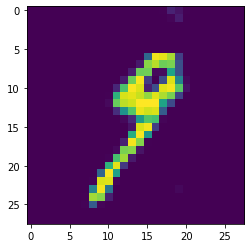

In [ ]:
plt.imshow(images[10,:,:,:].reshape([28,28]))

In [ ]:
discriminator.predict(images)[1]

array([[1.60423640e-17, 5.47593993e-14, 1.46561154e-08, 6.69201131e-13,
        2.06312798e-02, 6.94622181e-12, 1.28730847e-20, 3.54416203e-04,
        2.79010367e-03, 9.76224244e-01],
       [1.11690016e-16, 1.18946064e-23, 8.26698545e-16, 9.91649926e-17,
        4.38876095e-13, 2.86922776e-15, 3.62019683e-25, 9.03599862e-10,
        1.42826889e-10, 1.00000000e+00],
       [2.24349024e-20, 1.37072211e-13, 8.59343521e-13, 4.21651203e-09,
        4.91711126e-06, 1.09600862e-02, 7.70566188e-17, 4.47732617e-07,
        2.68259770e-09, 9.89034534e-01],
       [2.70611062e-17, 1.33913209e-16, 7.03537597e-13, 5.46162255e-07,
        1.42985641e-11, 1.53000124e-17, 4.60251795e-22, 2.41084059e-08,
        5.05089375e-08, 9.99999404e-01],
       [1.15959304e-12, 5.38787265e-23, 2.52559356e-14, 4.59374422e-17,
        4.61256636e-14, 1.56132628e-19, 5.21322627e-16, 9.29662163e-14,
        1.27701547e-08, 1.00000000e+00],
       [1.16891703e-24, 1.55004726e-16, 5.03778842e-21, 7.57241914e-09,
   

In [ ]:
(x_train, y_train), (_, _) = mnist.load_data()

# reshape data for CNN as (28, 28, 1) and normalize
image_size = x_train.shape[1]
x_train = np.reshape(x_train, [-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255
rand_indexes = np.random.randint(0,x_train.shape[0],size=1000)
real_images = x_train[rand_indexes]
real_labels = y_train[rand_indexes]


In [ ]:
result = discriminator.predict(real_images)[1]

In [ ]:
result_1 = np.argmax(result,axis=1)
print(np.sum(real_labels==result_1))

999
